<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating SVM on Multiple Data Sets

_Authors: Kiefer Katovich (SF)_

---

In this lab, you'll explore several data sets with SVM classifiers and compare them to logistic regression and KNN classifiers. 

Your "datasets" folder contains the following three data sets to choose from for the lab:

**Breast Cancer**

    ./datasets/breast_cancer_wisconsin

**Spambase**

    ./datasets/spam

**Car Evaluation**

    ./datasets/car_evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1) Load the breast cancer data.

- Are there any missing values? If so, impute or clean the data set.
- Select a classification target and predictors.

In [11]:
df = pd.read_csv('../datasets/breast_cancer_wisconsin/breast_cancer.csv', na_values='?')

In [12]:
df.isnull().sum()

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

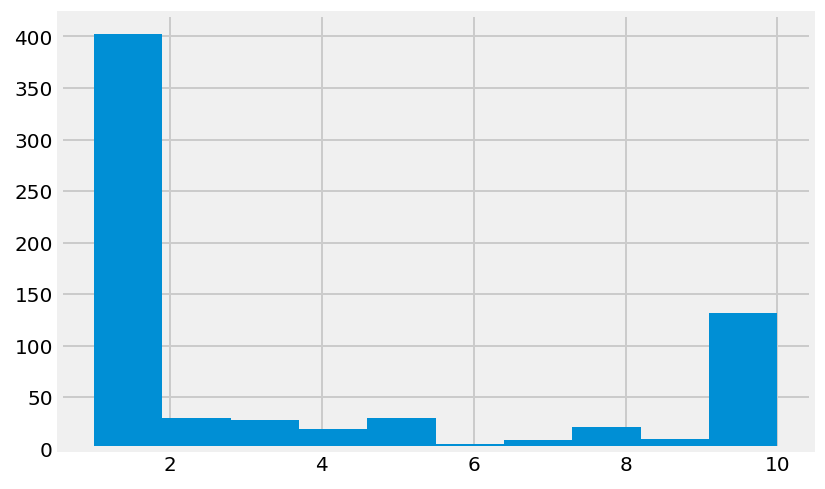

In [13]:
# There are 16 missing values in Bare_Nuclei.
df['Bare_Nuclei'].hist()

In [16]:
# Which class are the missing values?
df[df['Bare_Nuclei'].isnull()]['Class'].value_counts()

2    14
4     2
Name: Class, dtype: int64

In [17]:
# Let's drop them.
df.dropna(inplace=True)
df.isnull().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [18]:
df['Class'].unique()

array([2, 4])

In [19]:
X = df.drop(['Sample_code_number', 'Class'], axis = 1)
y = df['Class'].map(lambda x: 1 if x == 4 else 0)

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

### 2) Build an SVM classifier on the data.

For details on the SVM classifier, [click here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

- What's the baseline for accuracy?
- Initialize and train a linear SVM. What's the average accuracy score with a five-fold cross-validation?
- Repeat using a radial basis function (RBF) classifier. Compare the scores. Which one is better?
- Print a confusion matrix and classification report for your best model using training and testing data.

**Classification report**:

```python
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
```

**Confusion matrix**:

```python
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
```

In [21]:
# Baseline => 65 percent.
y.value_counts() / len(y)

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lin_model = SVC(kernel='linear')

scores = cross_val_score(lin_model, Xn, y, cv=5)
sm = scores.mean()
ss = scores.std()
print("Average score: {:0.3} +/- {:0.3}".format(sm, ss))

Average score: 0.968 +/- 0.0157


In [24]:
rbf_model = SVC(kernel='rbf')

scores = cross_val_score(rbf_model, Xn, y, cv=5)
sm = scores.mean()
ss = scores.std()
print("Average score: {:0.3} +/- {:0.3}".format(sm, ss))

Average score: 0.965 +/- 0.0203


In [25]:
from sklearn.metrics import classification_report

def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(confusion)
    print()
    print(classification_report(y_true, y_pred))
    

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)


Predicted    0   1  All
Actual                 
0          144   3  147
1            3  76   79
All        147  79  226

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       147
          1       0.96      0.96      0.96        79

avg / total       0.97      0.97      0.97       226



#### 2.A) Are there more false positives or false negatives? Is this good or bad?

> Answer: There are more false negatives, which is bad from the point of view of the patient but good from the point of view of the insurance company. This is the opposite for false positive.

### 3) Perform the steps above with a different data set.

Repeat each step.

In [27]:
car = pd.read_csv('../datasets/car_evaluation/car.csv')

In [28]:
car.head(3)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [29]:
car.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [30]:
car.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [31]:
car.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [32]:
car.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [33]:
car.acceptability.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [34]:
# Any n/a?
car.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [35]:
y = car.acceptability.map(lambda x: 1 if x in ['vgood','good'] else 0)

import patsy

X = patsy.dmatrix('~ buying + maint + doors + persons + lug_boot + safety -1',
                  data=car, return_type='dataframe')

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [36]:
y.value_counts() / len(y)
# The baseline is 92.2 percent. 

0    0.922454
1    0.077546
Name: acceptability, dtype: float64

In [37]:
lin_model = SVC(kernel='linear')

scores = cross_val_score(lin_model, Xn, y, cv=5)
print(scores)
sm = scores.mean()
ss = scores.std()
print("Average score: {:0.3} +/- {:0.3}".format(sm, ss))

[ 0.98554913  0.96242775  0.90462428  0.66473988  0.875     ]
Average score: 0.878 +/- 0.114


In [38]:
rbf_model = SVC(kernel='rbf')

scores = cross_val_score(rbf_model, Xn, y, cv=5)
print(scores)
sm = scores.mean()
ss = scores.std()
print("Average score: {:0.3} +/- {:0.3}".format(sm, ss))

[ 0.94219653  0.95086705  0.93930636  0.68786127  0.53488372]
Average score: 0.811 +/- 0.17


In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)


Predicted    0   1  All
Actual                 
0          521   6  527
1            7  37   44
All        528  43  571

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       527
          1       0.86      0.84      0.85        44

avg / total       0.98      0.98      0.98       571



### 4) Compare SVM, KNN, and logistic regression using a data set.

You should:

- Use grid-search optimal parameters for each (for SVM, just grid search C and kernel).
- Cross-validate scores.
- Examine confusion matrices and classification reports.

**Bonus:**

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Check out [the documentation](http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves) for how to use this function in scikit-learn.

In [40]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [41]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted    0   1  All
Actual                 
0          527   0  527
1            4  40   44
All        531  40  571

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       527
          1       1.00      0.91      0.95        44

avg / total       0.99      0.99      0.99       571



In [43]:
# Grid search KNN.
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors':list(range(1,51)),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)
knn_gs.fit(Xn, y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [44]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
print(knn_gs.best_score_)

{'n_neighbors': 50, 'weights': 'uniform'}
0.9184027777777778


In [45]:
# Grid search SVM.
from sklearn.svm import SVC

svc_params = {
    'C':np.logspace(-3, 2, 10),
    'gamma':np.logspace(-5, 2, 10),
    'kernel':['linear','rbf']
}

svc_gs = GridSearchCV(SVC(), svc_params, cv=3, verbose=1)
svc_gs.fit(Xn, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   12.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [46]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 0.001, 'gamma': 1.0000000000000001e-05, 'kernel': 'linear'}
0.9224537037037037


In [47]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4, 2, 40),
    'solver':['liblinear']
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(Xn, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   1.42510e-04,   2.03092e-04,   2.89427e-04,
         4.12463e-04,   5.87802e-04,   8.37678e-04,   1.19378e-03,
         1.70125e-03,   2.42446e-03,   3.45511e-03,   4.92388e-03,
         7.01704e-03,   1.00000e-02,   1.42510e-02,   2.0...6e+01,
         3.45511e+01,   4.92388e+01,   7.01704e+01,   1.00000e+02]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [48]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
0.9224537037037037
